# <ins> Futuristic Airbnb </ins>

Airbnb has successfully disrupted the traditional hospitality industry as more and more travelers decide to use Airbnb as their primary accommodation provider. Since its beginning in 2008, Airbnb has seen an enormous growth, with the number of rentals listed on its website growing exponentially each year. In Germany, no city is more popular than Berlin. That implies that Berlin is one of the hottest markets for Airbnb in Europe, with over 22,552 listings as of November 2018.Here we will be using Python with some packages like Pandas and Matplotlib to analyze data  to find a better Accommodation based on customer satisfaction and to improve the Airbnb business based on certain factors in Berlin.

<hr> </hr>

In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import json
import gmaps

In [2]:
#Reading Files and storing in Dataframes

Calendar_Summary_df = pd.read_csv("../Dataset/calendar_summary.csv")
Listings_df = pd.read_csv("../Dataset/listings.csv")
Listings_Summary_df = pd.read_csv("../Dataset/listings_summary.csv")
Neighbourhoods_df = pd.read_csv("../Dataset/neighbourhoods.csv")
Reviews_df = pd.read_csv("../Dataset/reviews.csv")
Reviews_Summary = pd.read_csv("../Dataset/reviews_summary.csv")
calendar_insideairbnb_df = pd.read_csv("../Dataset/calendar.csv")


### <ins> Identifying the Columns </ins>

In [162]:
calendar_insideairbnb_df.dtypes


listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [3]:
Listings_Summary_df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,0.0,0.0,0.0,2.255200e+04,0.0,22526.000000,22526.000000,22552.000000,...,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018111e+13,NaN,NaN,NaN,5.403355e+07,NaN,2.330685,2.330685,52.509824,...,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,4.812607e+00,NaN,NaN,NaN,5.816290e+07,NaN,19.947823,19.947823,0.030825,...,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018111e+13,NaN,NaN,NaN,2.217000e+03,NaN,0.000000,0.000000,52.345803,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018111e+13,NaN,NaN,NaN,9.240002e+06,NaN,1.000000,1.000000,52.489065,...,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018111e+13,NaN,NaN,NaN,3.126711e+07,NaN,1.000000,1.000000,52.509079,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018111e+13,NaN,NaN,NaN,8.067518e+07,NaN,2.000000,2.000000,52.532669,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018111e+13,NaN,NaN,NaN,2.245081e+08,NaN,1676.000000,1676.000000,52.651670,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


In [9]:
Listings_df.columns
len(Listings_df)

22552

In [5]:
Listings_Summary_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
Neighbourhoods_df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

### <ins> Keeping the Necessary Columns </ins>

In [7]:
#Columns which are necessary alone we can store it in the below df. ()

#Calendar_Summary_df = 
#Listings_df = 
#Listings_Summary_df = 
#Neighbourhoods_df = 
#Reviews_df = 
#Reviews_Summary = 

### <ins> Data Cleaning </ins>

## <ins> Visualizations </ins>

In [3]:
#to retrive the month value
#Calendar_Summary_Price = (Calendar_Summary_df['price'])
#calendar_new_price = []
#for x in new_calendar_file['price']:
 #   x = x.replace('$','')
  #  calendar_new_price.append(x)
    
#type(calendar_new_price)
#new_calendar_file['available']== 't'  
import psutil
svmem = psutil.virtual_memory()
print (svmem.available)

776466432


In [4]:
#using this to set exception for memory error
path =r"C:\Users\prabh\Desktop\Dataset\calendar.csv"
df_sample = pd.read_csv(path, nrows=10)
df_sample_size = df_sample.memory_usage(index=True).sum()
print (df_sample_size)
print (df_sample)
my_chunk = (1000000000 / df_sample_size)/10
my_chunk = int(my_chunk//1) # we get the integer part
print (my_chunk)
iter_csv = pd.read_csv(
   path,
   iterator=True,
   chunksize=my_chunk)
df_result = pd.concat(
   [chunk[chunk['listing_id']>0]
   for chunk in iter_csv])
print (df_result)

640
   listing_id        date available   price adjusted_price  minimum_nights  \
0        3176  2019-06-08         f  $90.00         $90.00              62   
1        1944  2019-06-09         t  $20.00         $20.00             120   
2        1944  2019-06-10         t  $20.00         $20.00             120   
3        1944  2019-06-11         t  $20.00         $20.00             120   
4        1944  2019-06-12         t  $20.00         $20.00             120   
5        1944  2019-06-13         t  $20.00         $20.00             120   
6        1944  2019-06-14         t  $20.00         $20.00             120   
7        1944  2019-06-15         t  $20.00         $20.00             120   
8        1944  2019-06-16         t  $20.00         $20.00             120   
9        1944  2019-06-17         t  $20.00         $20.00             120   

   maximum_nights  
0            1125  
1             120  
2             120  
3             120  
4             120  
5             120

Text(0, 0.5, 'Price')

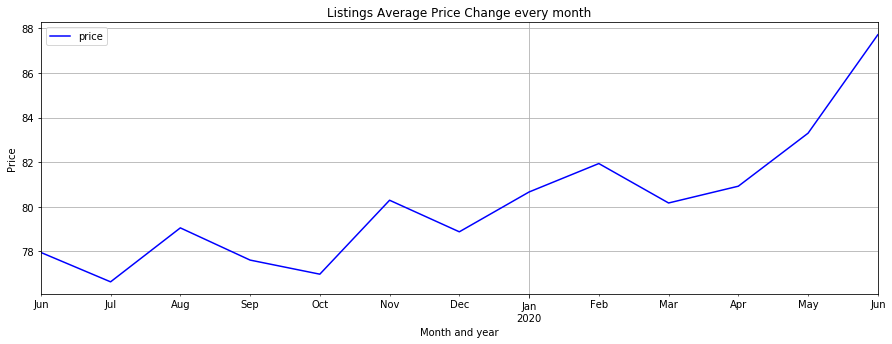

In [8]:
#Price Prediction 

new_cal_insideairbnb = calendar_insideairbnb_df.dropna(how = "any")
new_cal_insideairbnb_file = new_cal_insideairbnb.price.str[1:-3]
new_insideairbnb = new_cal_insideairbnb_file.str.replace(",","")
                                            
calendar_new_insideairbnb = new_insideairbnb.astype('int64')
#new_calendar_df = pd.DataFrame({'listing id':new_cal_insideairbnb['listing_id'],'date' : new_cal_insideairbnb['date'] , 'available':new_cal_insideairbnb['available'] ,'price': calendar_new_insideairbnb})
new_inside = pd.to_datetime(new_cal_insideairbnb['date']).dt.to_period('M')
new_insideairbnb_df = pd.DataFrame({'date':new_inside,'price':calendar_new_insideairbnb})
new_airbnb = new_insideairbnb_df.groupby(['date'])

new_inside_sum = new_airbnb.mean()

new_inside_sum.plot(y='price',kind = 'line', figsize = (15,5),color="blue")
plt.grid()
plt.title('Listings Average Price Change every month')
plt.xlabel('Month and year')
plt.ylabel('Price')

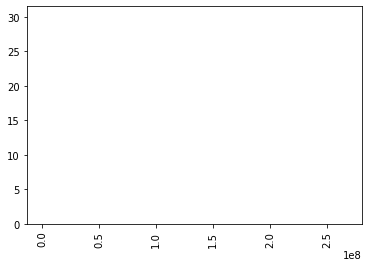

In [100]:

#Availability Frequency
                                                
#listings_insideairbnb_df = pd.read_csv("../Dataset/listings_insideairbnb.csv")
#listings_insideairbnb_final = pd.DataFrame({'listing_id':listings_insideairbnb_df['host_id'],
 #                                         'Available number of days' :listings_insideairbnb_df['availability_30']  })

# plt.bar(listings_insideairbnb_final['listing_id'],listings_insideairbnb_final['Available number of days'])
# plt.xticks(rotation = 'vertical')
# plt.show()
#listings_insideairbnb_df['availability_30']

#new_cal_insideairbnb['available']
#new_cal_insideairbnb['date']
#new_cal_insideairbnb['listing_id']


In [146]:
listly_10 =listings_insideairbnb_df.loc[listings_insideairbnb_df['availability_30'] < 10,:]
availability_10 = listly_10['id'].count()
#listg = listly.count()
#listg.head()

In [147]:
listly_20 =listings_insideairbnb_df.loc[(listings_insideairbnb_df['availability_30'] > 10) & (listings_insideairbnb_df['availability_30'] < 20),:]
availability_20 = listly_20['id'].count()

In [140]:
listly_30 =listings_insideairbnb_df.loc[(listings_insideairbnb_df['availability_30'] > 20) & (listings_insideairbnb_df['availability_30'] <= 30),:]
availability_30 = listly_30['id'].count()

1281

In [153]:
labels = ['0-10','10-20','20-30']
#availability_count = (pd.DataFrame({'availability_10':availability_10,'availability_20':availability_20,'availability_30':availability_30},index = [0]))
availability_count = ([20385,1732,1281])
#availability_count_new = (availability_count)

Text(0.5, 1.0, 'Number of listings avaialable based on selected days')

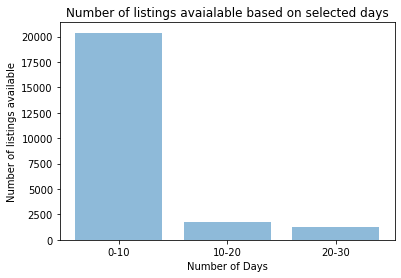

In [155]:

plt.bar(labels,availability_count,align='center',alpha = 0.5)
plt.xlabel('Number of Days')
plt.ylabel('Number of listings available')
plt.title('Number of listings avaialable based on selected days')
